# COMP 9517 Lab02

### Import Libraries

In [105]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

## Task 1: Compute the SIFT features

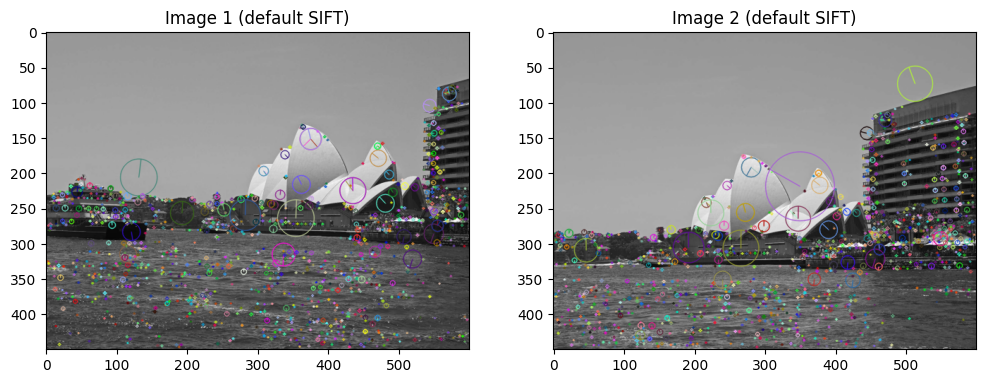

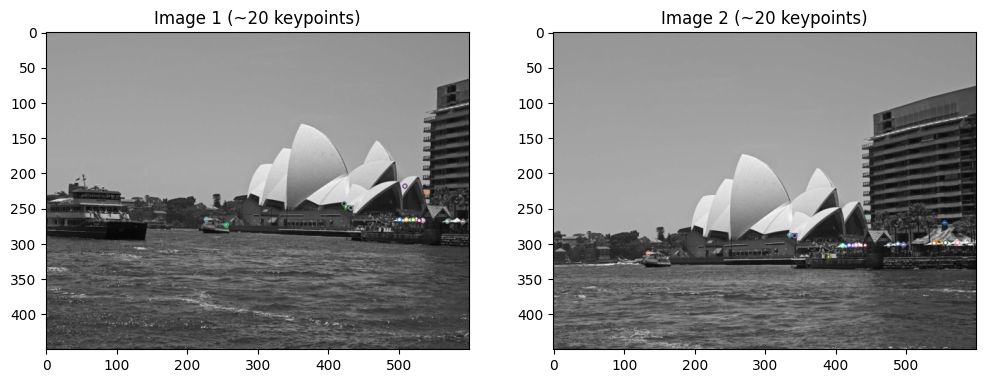

Task 1(b): Used 'nfeatures=20' to limit SIFT keypoints to ~20 most prominent ones.
This parameter directly caps the number of keypoints by response strength.
However, actual count may be <20 if image lacks sufficient distinctive features.


In [106]:
# --- Paths and loading ---
image_dir = "COMP9517_25T3_Lab2_Images"
img1 = cv2.imread(f'{image_dir}/image3.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(f'{image_dir}/image4.jpg', cv2.IMREAD_GRAYSCALE)
assert img1 is not None and img2 is not None, "Images not found!"

# --- Resize to max width 600 ---
def resize_max_width(img, max_w=600):
    h, w = img.shape
    if w <= max_w:
        return img
    scale = max_w / w
    return cv2.resize(img, (max_w, int(h * scale)), interpolation=cv2.INTER_AREA)

img1, img2 = resize_max_width(img1), resize_max_width(img2)

# --- Task 1(a): Default SIFT ---
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

img1_kp_def = cv2.drawKeypoints(img1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_kp_def = cv2.drawKeypoints(img2, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(12, 6))
plt.subplot(121); plt.imshow(cv2.cvtColor(img1_kp_def, cv2.COLOR_BGR2RGB)); plt.title('Image 1 (default SIFT)')
plt.subplot(122); plt.imshow(cv2.cvtColor(img2_kp_def, cv2.COLOR_BGR2RGB)); plt.title('Image 2 (default SIFT)')
plt.show()

# --- Task 1(b): ~20 keypoints using nfeatures ---
sift20 = cv2.SIFT_create(nfeatures=20)
kp1_20, _ = sift20.detectAndCompute(img1, None)
kp2_20, _ = sift20.detectAndCompute(img2, None)

img1_kp_20 = cv2.drawKeypoints(img1, kp1_20, None)
img2_kp_20 = cv2.drawKeypoints(img2, kp2_20, None)

plt.figure(figsize=(12, 6))
plt.subplot(121); plt.imshow(cv2.cvtColor(img1_kp_20, cv2.COLOR_BGR2RGB)); plt.title(f'Image 1 (~{len(kp1_20)} keypoints)')
plt.subplot(122); plt.imshow(cv2.cvtColor(img2_kp_20, cv2.COLOR_BGR2RGB)); plt.title(f'Image 2 (~{len(kp2_20)} keypoints)')
plt.show()

# --- Explanation ---
print("Task 1(b): Used 'nfeatures=20' to limit SIFT keypoints to ~20 most prominent ones.")
print("This parameter directly caps the number of keypoints by response strength.")
print("However, actual count may be <20 if image lacks sufficient distinctive features.")

## Task 2: Recompute the SIFT features

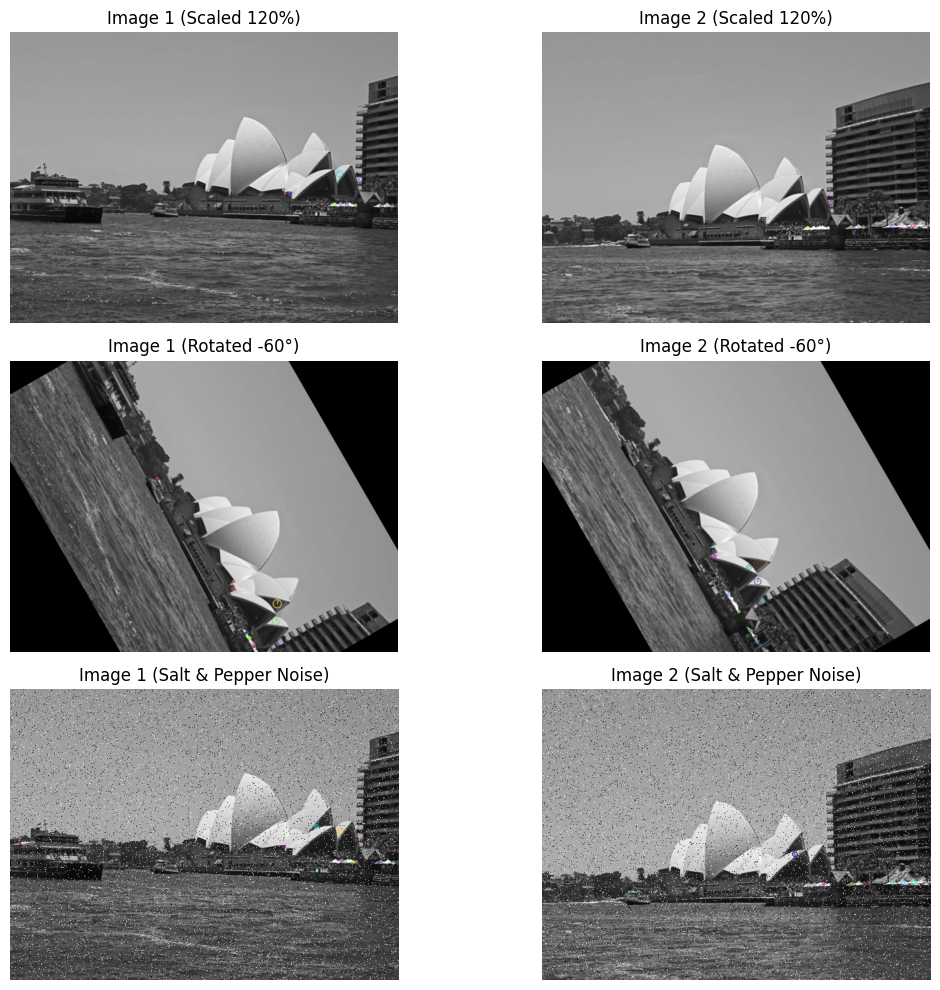


--- Task 2 Analysis ---
Q1: Are keypoints roughly the same as originals?
A1: Yes. SIFT detects similar structural features (corners, edges) despite transformations.

Q2: What does this say about SIFT robustness?
A2: SIFT is robust to scaling, rotation, and moderate salt-and-pepper noise.

Q3: To which transformation is SIFT most robust?
A3: SIFT is most robust to rotation and scaling. Noise robustness is good but secondary.


In [107]:
# Create SIFT detector with ~20 keypoints (independent of Task 1)
sift20 = cv2.SIFT_create(nfeatures=20)

def draw_sift_keypoints(img, detector):
    kp, _ = detector.detectAndCompute(img, None)
    return cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# --- a) Scale by 120% ---
img1_scaled = cv2.resize(img1, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
img2_scaled = cv2.resize(img2, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)

# --- b) Rotate clockwise 60° (note: OpenCV rotates counter-clockwise by default) ---
def rotate_image(img, angle_deg):
    h, w = img.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, -angle_deg, 1.0)  # negative for clockwise
    return cv2.warpAffine(img, M, (w, h))

img1_rot = rotate_image(img1, 60)
img2_rot = rotate_image(img2, 60)

# --- c) Salt & Pepper noise (5%) ---
def add_salt_pepper_noise(img, amount=0.05):
    noisy = random_noise(img, mode='s&p', amount=amount)
    return (noisy * 255).astype(np.uint8)

img1_noisy = add_salt_pepper_noise(img1)
img2_noisy = add_salt_pepper_noise(img2)

# --- Draw keypoints ---
images = [
    (draw_sift_keypoints(img1_scaled, sift20), draw_sift_keypoints(img2_scaled, sift20)),
    (draw_sift_keypoints(img1_rot, sift20), draw_sift_keypoints(img2_rot, sift20)),
    (draw_sift_keypoints(img1_noisy, sift20), draw_sift_keypoints(img2_noisy, sift20))
]

titles = ["Scaled 120%", "Rotated -60°", "Salt & Pepper Noise"]

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
for i in range(3):
    for j in range(2):
        # Convert BGR to RGB for correct color display
        img_rgb = cv2.cvtColor(images[i][j], cv2.COLOR_BGR2RGB)
        axes[i, j].imshow(img_rgb)
        axes[i, j].set_title(f"Image {j+1} ({titles[i]})")
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

# --- Answers ---
print("\n--- Task 2 Analysis ---")
print("Q1: Are keypoints roughly the same as originals?")
print("A1: Yes. SIFT detects similar structural features (corners, edges) despite transformations.")
print("\nQ2: What does this say about SIFT robustness?")
print("A2: SIFT is robust to scaling, rotation, and moderate salt-and-pepper noise.")
print("\nQ3: To which transformation is SIFT most robust?")
print("A3: SIFT is most robust to rotation and scaling. Noise robustness is good but secondary.")

## Task 3: Match and stitch the two pictures 

Good matches: 28


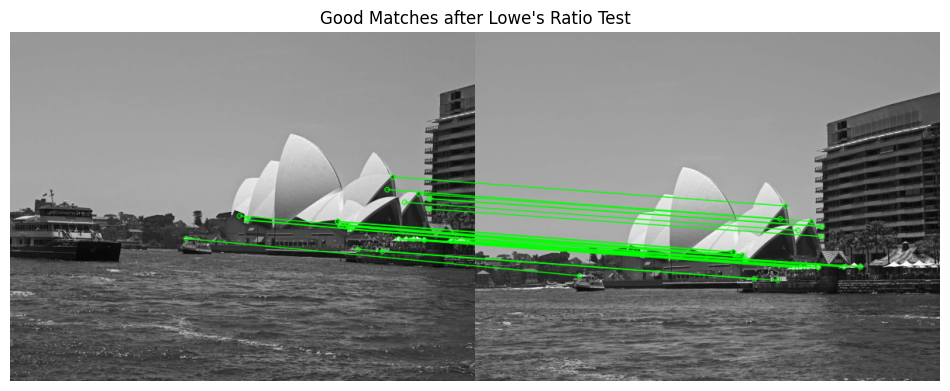

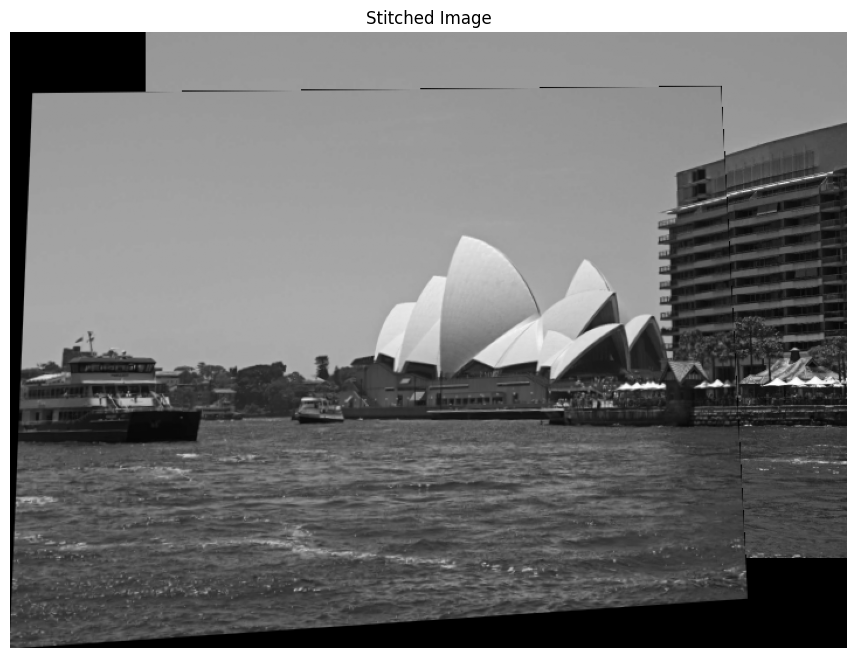

In [108]:
# --- Feature extraction (use more keypoints for matching) ---
sift = cv2.SIFT_create(nfeatures=50)  # More keypoints for robust matching
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

if des1 is None or des2 is None:
    raise ValueError("Descriptors could not be computed.")

# --- Matching with Lowe's ratio test ---
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

print(f"Good matches: {len(good_matches)}")
if len(good_matches) < 4:
    raise ValueError("Not enough matches for homography.")

# --- Homography estimation with RANSAC ---
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# --- Compute output canvas size ---
h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]

corners1 = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
corners1_t = cv2.perspectiveTransform(corners1, H)
corners2 = np.float32([[0, 0], [0, h2], [w2, h2], [w2, 0]]).reshape(-1, 1, 2)

all_corners = np.concatenate((corners1_t, corners2), axis=0)
x_min, y_min = np.int32(all_corners.min(axis=0).ravel())
x_max, y_max = np.int32(all_corners.max(axis=0).ravel())

# Translation to make all coordinates positive
T = np.array([[1, 0, -x_min], [0, 1, -y_min], [0, 0, 1]], dtype=np.float32)
H_t = T @ H

canvas_w, canvas_h = x_max - x_min, y_max - y_min

# --- Warp and stitch ---
warped_img1 = cv2.warpPerspective(img1, H_t, (canvas_w, canvas_h))
stitched = np.zeros((canvas_h, canvas_w), dtype=img1.dtype)

# Place img2 at translated position
stitched[-y_min:-y_min + h2, -x_min:-x_min + w2] = img2

# Overlay warped img1 (non-zero pixels take precedence)
mask1 = warped_img1 != 0
stitched[mask1] = warped_img1[mask1]

# --- Visualization ---
# Matches
img_matches = cv2.drawMatchesKnn(
    img1, kp1, img2, kp2, [[m] for m in good_matches],
    None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
    matchColor=(0, 255, 0)
)
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))  # Convert to RGB
plt.title("Good Matches after Lowe's Ratio Test")
plt.axis('off')
plt.show()

# Stitched result (this is a grayscale image, so keep cmap='gray')
plt.figure(figsize=(12, 8))
plt.imshow(stitched, cmap='gray')
plt.title("Stitched Image")
plt.axis('off')
plt.show()